### Project Introduction
In this project, we will examine a dataset containing annual expenditure amounts from various customers across different product categories, reported in currency units. One of the objectives is to comprehensively characterize the differences faced by wholesale distributors in interacting with different types of customers. Through such analysis, distributors will gain a deeper understanding of how to optimally structure their delivery services to meet the unique needs of each customer. The dataset for this project can be found in the UCI Machine Learning Repository. During the analysis, the features "Channel" and "Region" will be excluded, focusing specifically on customer records related to six product categories. It is important to note that this dataset is not intended for a classification or prediction task, as it lacks labeled fields. Instead, it is more suitable for feature analysis, feature selection, unsupervised learning, and recommendation systems. This project employs unsupervised learning methods to explore potential patterns within the dataset, aiding in the classification of different customer groups and facilitating the recommendation clustering for delivery services.

In [6]:
# import libraries
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
# Show matplotlib plots inline
%matplotlib inline

# Load the wholesale customers dataset
data = pd.read_csv("./data/customers.csv")
data.drop(['Region', 'Channel'], axis = 1, inplace = True)

# Show the first 5 rows
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


**Descriptive Statistics**: We analyzed a number of descriptive features for different characteristics, including mean, standard deviation, quantile

In [4]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#### Visualize Feature Distributions
To gain a deeper insight into the dataset, we can utilize the Seaborn pairplot function to generate a scatterplot matrix encompassing six product features. By displaying scatter plots between each pair of features in the matrix, we can visually examine the relationships and trends existing among them. This visualization approach aids in uncovering interactions between different features, facilitating a more comprehensive understanding of the dataset's structure and characteristics. Such a scatterplot matrix can provide valuable clues for further data analysis and pattern recognition.

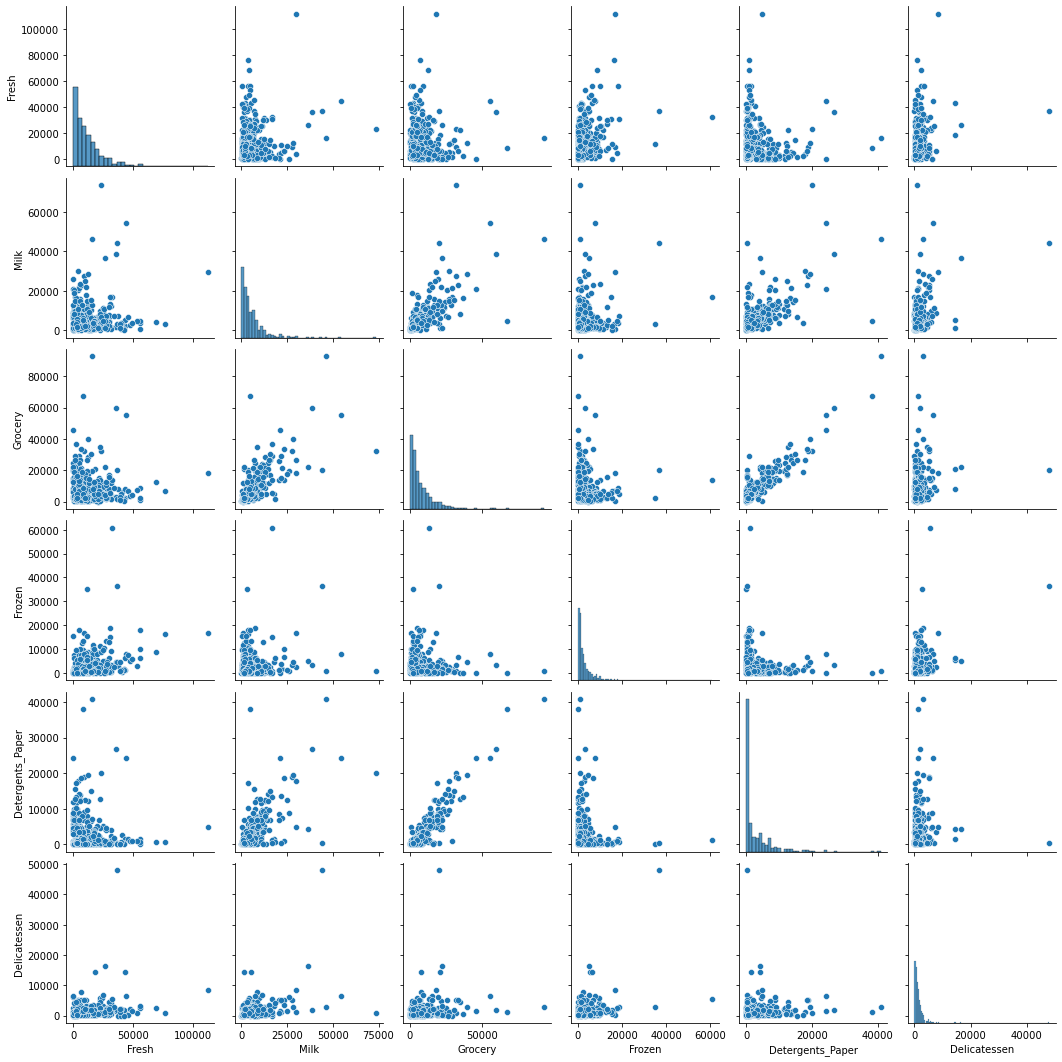

In [7]:
sns.pairplot(data)
plt.show()

We observed a strong positive correlation between Grocery and Detergents_Paper.

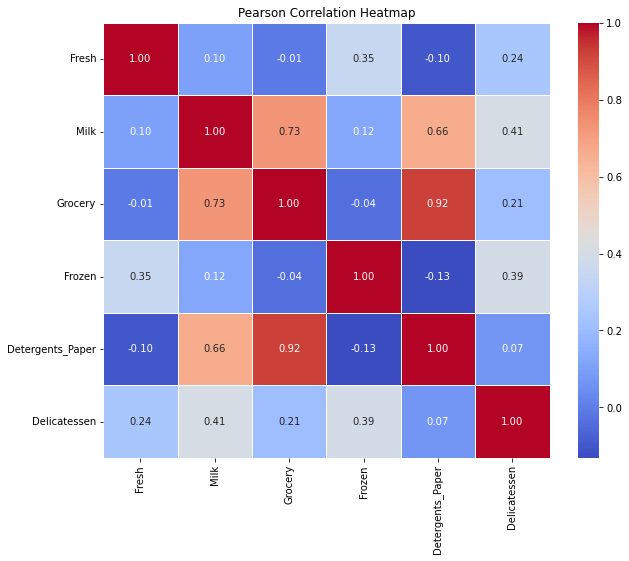

In [8]:
# Calculate Pearson relevant score
correlation_matrix = data.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Pearson Correlation Heatmap')
plt.show()

### Data preprocess

In [9]:
from sklearn.preprocessing import StandardScaler

# Drop null rows
data = data.dropna()

# Normalization
scaler = StandardScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_normalized.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


Revision the pair plot

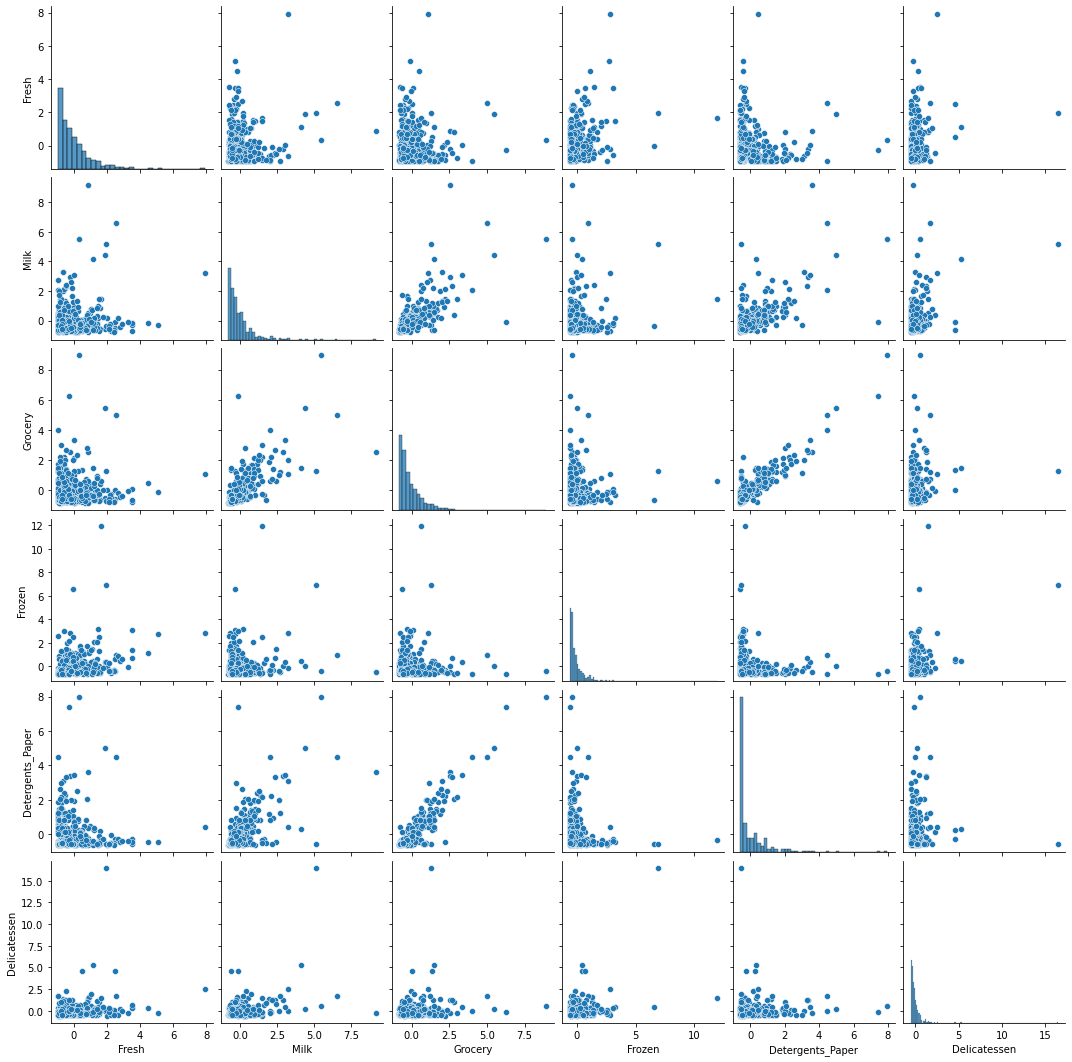

In [10]:
sns.pairplot(data_normalized)
plt.show()

This seems to yield similar correlation results, but we believe that the normalized data may prove beneficial for subsequent tasks.

### Prediction
We utilize features other than Grocery to predict Grocery values, followed by reporting various loss metrics, including Mean Squared Error (MSE), Mean Absolute Error (MAE), and Mean Absolute Percentage Error (MAPE). Simultaneously, we employ visualizations such as scatter plots of predicted versus actual values and fitting curves. This approach aids in gaining a deeper understanding of the model's performance, showcasing the relationship between predicted results and actual observations, as well as the model's fit to the data. This comprehensive evaluation method aims to provide a holistic understanding of the overall performance of the predictive model.

In [49]:
Y = data['Grocery']
X = data.drop("Grocery", axis=1)
X = X.values
Y = Y.values

In [50]:
#trainnig, validation, testing split

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#split X_train and Y_train into a 'pure' training set and a validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=0)
print('train:', X_train.shape, Y_train.shape)
print('validation:', X_val.shape, Y_val.shape)
print('test:', X_test.shape, Y_test.shape)

train: (316, 5) (316,)
validation: (36, 5) (36,)
test: (88, 5) (88,)


#### LinearRegression

In [51]:
from sklearn.linear_model import LinearRegression

# step1:
linear_model = LinearRegression(fit_intercept=True)

In [52]:
# step2:
linear_model.fit(X_train, Y_train)

LinearRegression()

In [53]:
# step3:
Y_train_pred = linear_model.predict(X_train)
Y_test_pred = linear_model.predict(X_test)

Evaluate

In [54]:
print('Evaluate model on traning set')
MSE = np.mean((Y_train - Y_train_pred)**2)
MAE = np.mean(np.abs(Y_train - Y_train_pred))
MAPE =  np.mean(np.abs(Y_train - Y_train_pred)/Y_train)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)
print('Evaluate model on testing set')
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
MAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)

Evaluate model on traning set
MSE= 10985162.22625825
MAE= 2054.078481819716
MAPE= 2.9229186783410226
Evaluate model on testing set
MSE= 8484926.814973056
MAE= 1962.592889849374
MAPE= 0.45667510178873516


In [55]:
# compute R2 on the training set and the testing set
score_train = linear_model.score(X_train, Y_train)
print(score_train)
score_test = linear_model.score(X_test, Y_test)
print(score_test)

0.8926039090170013
0.8678599228136836


Text(0, 0.5, 'Y_train_pred')

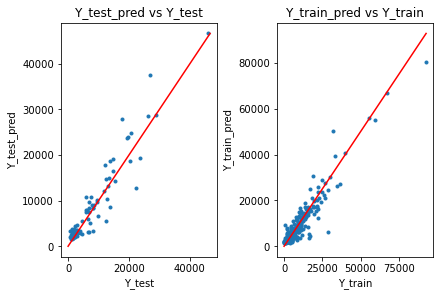

In [56]:
# the red line is the 45-degree line
fig, ax = plt.subplots(1,2,constrained_layout=True)
ax[0].set_title('Y_test_pred vs Y_test')
ax[0].plot(Y_test, Y_test_pred, '.')
ymax=np.max([Y_test.max(), Y_test_pred.max()])
ax[0].plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
ax[0].set_xlabel('Y_test')
ax[0].set_ylabel('Y_test_pred')
ax[1].set_title('Y_train_pred vs Y_train')
ax[1].plot(Y_train, Y_train_pred, '.')
ymax=np.max([Y_train.max(), Y_train_pred.max()])
ax[1].plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
ax[1].set_xlabel('Y_train')
ax[1].set_ylabel('Y_train_pred')

### Outlier Detection

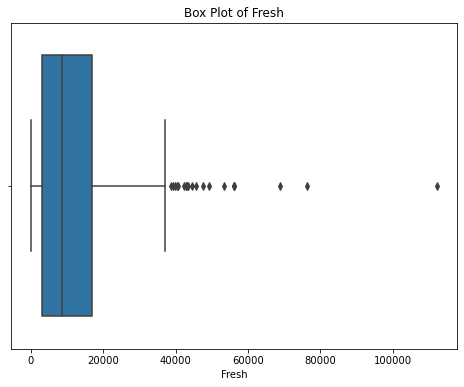

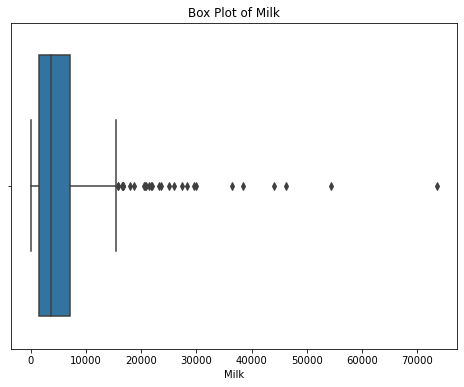

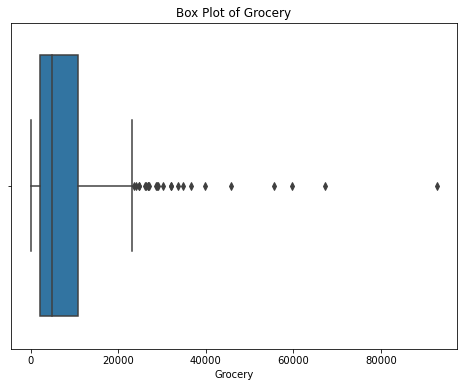

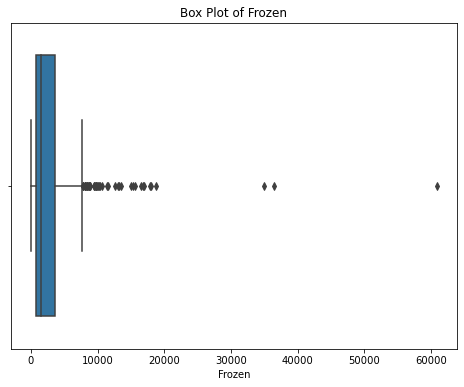

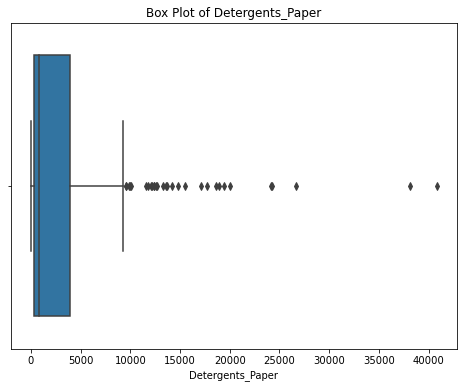

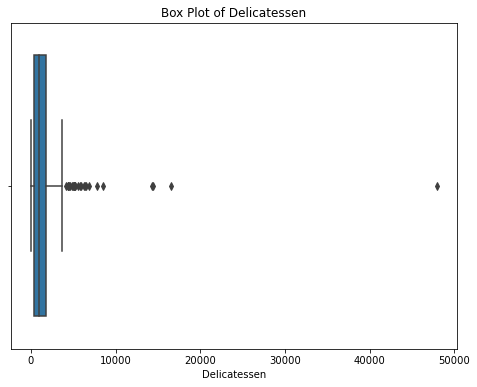

In [57]:
# Initialize DataFrames to store outlier data
outliers_dataframes = {}

# Set the threshold for outlier detection
threshold = 1.5

# Iterate through each column for outlier detection
for column in data.columns:
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Calculate lower and upper limits for outliers
    lower_limit = Q1 - threshold * IQR
    upper_limit = Q3 + threshold * IQR

    # Filter out outliers based on the condition
    outliers = data[(data[column] < lower_limit) | (data[column] > upper_limit)]

    # Store outliers data in the corresponding DataFrame
    outliers_dataframes[column + '_outliers'] = outliers

    # Use Seaborn to create a boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

In [58]:
# Output DataFrames containing outlier data for each column
for key, value in outliers_dataframes.items():
    print(f"\nOutliers in {key}:\n{value}")


Outliers in Fresh_outliers:
      Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
29    43088   2100     2609    1200              1107           823
39    56159    555      902   10002               212          2916
47    44466  54259    55571    7782             24171          6465
52    40721   3916     5876     532              2587          1278
87    43265   5025     8117    6312              1579         14351
103   56082   3504     8906   18028              1480          2498
125   76237   3473     7102   16538               778           918
129   42312    926     1510    1718               410          1819
176   45640   6958     6536    7368              1532           230
181  112151  29627    18148   16745              4948          8550
239   47493   2567     3779    5243               828          2253
258   56083   4563     2124    6422               730          3321
259   53205   4959     7336    3012               967           818
282   49063   3965 

### Feature transformed
It seems that the data points are spread out along a principal direction. <br>
What is that principal direction/axis ? <br>
Now, let's use Scikit-Learn's ``PCA`` to find out ...

#### Dimensionality Reduction

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, whiten=False) # K = M
pca.fit(X)

PCA(n_components=2)

In [60]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->', linewidth=2, color ='k',
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

In [70]:
Y2d = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", Y2d.shape)

original shape:    (440, 5)
transformed shape: (440, 2)


Observation

In [72]:
Y2d

array([[ 5.52070264e+02,  3.09972629e+03],
       [-4.69684238e+03,  4.06017588e+03],
       [-4.99367090e+03,  4.11272577e+03],
       [ 1.43810802e+03, -5.07074769e+03],
       [ 1.07849821e+04, -1.18840447e+03],
       [-2.66332672e+03,  1.75148895e+03],
       [-5.73823539e+02, -2.36372921e+03],
       [-4.57583623e+03, -1.07754745e+02],
       [-6.53542222e+03, -2.13726254e+03],
       [-5.81510013e+03,  7.20264244e+03],
       [-8.38825046e+03,  1.83363689e+03],
       [ 4.66023595e+02, -5.43248423e+03],
       [ 1.95582970e+04,  4.71840149e+03],
       [ 8.90966409e+03,  1.31778034e+03],
       [ 1.22913330e+04,  3.22563174e+03],
       [-2.54997339e+03, -5.07061656e+03],
       [-1.10425844e+04,  4.08200992e+03],
       [-6.05491404e+03, -9.50123421e+01],
       [ 6.50343275e+03,  7.65613888e+01],
       [-4.85662293e+03, -2.93212811e+03],
       [ 5.08162473e+03, -1.82479316e+03],
       [-6.68500055e+03, -5.07589096e+03],
       [ 1.97487649e+04, -4.53990569e+03],
       [ 1.

The transformed data has been reduced to a bi-dimension.
To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data `Y2d` to obtain a reconstructed version `X_rec` of the original data `X`

(-6790.444204806709, 117814.87829546699, -3987.216634048662, 77187.77222066898)

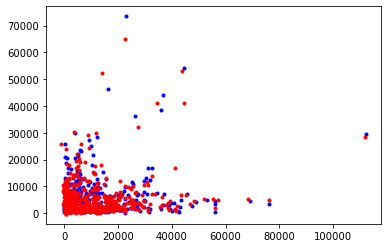

In [71]:
X_rec = pca.inverse_transform(Y2d)

fig, ax = plt.subplots()
ax.plot(X[:, 0], X[:, 1], 'b.')
ax.plot(X_rec[:, 0], X_rec[:, 1], 'r.')
ax.axis('equal')

The blue points are the original data, while the red points are the projected version.

Take a look at the cumulative variance of these components to see how much of the data information the projection is preserving:

In [ ]:
pca_multi_components = PCA(n_components=6, svd_solver='randomized')
pca_multi_components.fit(X)

In [ ]:
plt.plot(np.cumsum(pca_multi_components.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We see that these 150 components account for just over 90% of the variance.
That would lead us to believe that using these 150 components, we would recover most of the essential characteristics of the data.

### Clustering
The K-Means clustering algorithm and the Gaussian mixture model clustering algorithm will be used optionally to identify various customer groups hidden in the data. Then, specific data points are recovered from the clusters to understand their significance by converting them back to their original dimensions and proportions.

Text(0, 0.5, 'demention 2')

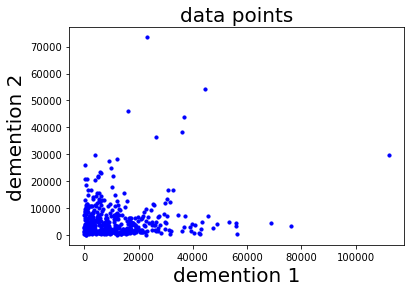

In [73]:
# Plotting the data points
fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c='blue', s=10)
ax.set_title('data points', fontsize=20)
ax.set_xlabel('demention 1', fontsize=20)
ax.set_ylabel('demention 2', fontsize=20)

In [76]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

model=KMeans(n_clusters=3, random_state=0)
model.fit(data)
label=model.predict(data) # get the cluster label of each customer

In [77]:
label

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 2, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 2, 2, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2,
       1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Text(0, 0.5, 'spend')

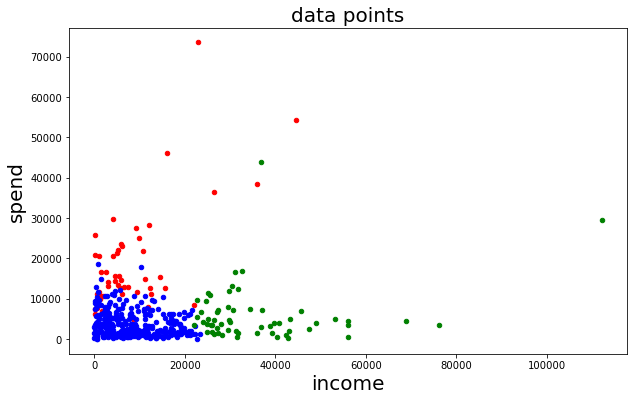

In [79]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(X[label==0, 0], X[label==0, 1], c='red', s=20)
ax.scatter(X[label==1, 0], X[label==1, 1], c='blue', s=20)
ax.scatter(X[label==2, 0], X[label==2, 1], c='green', s=20)
ax.set_title('data points', fontsize=20)
ax.set_xlabel('income', fontsize=20)
ax.set_ylabel('spend', fontsize=20)

Discover the center of  each cluster.

In [80]:
center=model.cluster_centers_
center

array([[ 7751.98113208, 17910.50943396, 27037.90566038,  1970.94339623,
        12104.86792453,  2185.73584906],
       [ 8341.61280488,  3779.89329268,  5152.17378049,  2577.23780488,
         1720.57317073,  1136.54268293],
       [36156.38983051,  6123.6440678 ,  6366.77966102,  6811.11864407,
         1050.01694915,  3090.05084746]])

Revision the plot with cluster center

Text(0, 0.5, 'spending')

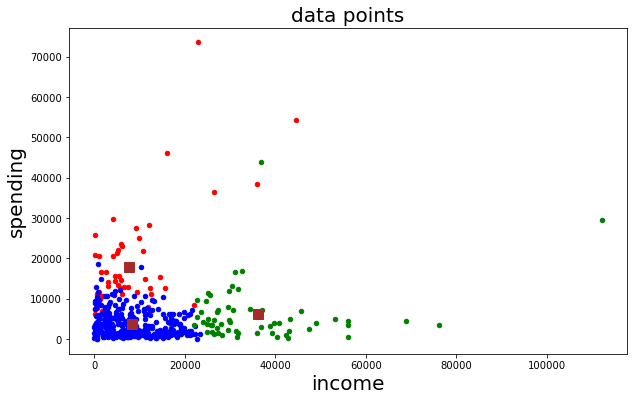

In [82]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(X[label==0, 0], X[label==0, 1], c='red', s=20)
ax.scatter(X[label==1, 0], X[label==1, 1], c='blue', s=20)
ax.scatter(X[label==2, 0], X[label==2, 1], c='green', s=20)
ax.plot(center[0,0], center[0,1], c='brown', marker='s', markersize=10)
ax.plot(center[1,0], center[1,1], c='brown', marker='s', markersize=10)
ax.plot(center[2,0], center[2,1], c='brown', marker='s', markersize=10)
ax.set_title('data points', fontsize=20)
ax.set_xlabel('income', fontsize=20)
ax.set_ylabel('spending', fontsize=20)

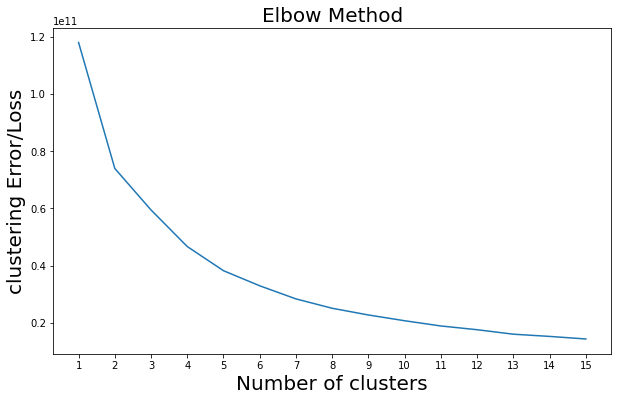

In [85]:
from sklearn.cluster import KMeans
error_list = []
for K in range(1,16):
    model=KMeans(n_clusters=K, random_state=0)
    model.fit(X)
    error_list.append(model.inertia_)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(range(1,16), error_list)
ax.set_title('Elbow Method', fontsize=20)
ax.set_xlabel('Number of clusters', fontsize=20)
ax.set_ylabel('clustering Error/Loss', fontsize=20)
ax.set_xticks(range(1,16));

We observe that increasing the number of clustering centers leads to lower errors.

#### The Gaussian Mixture Model in 2D (Reduced dimention with PCA)


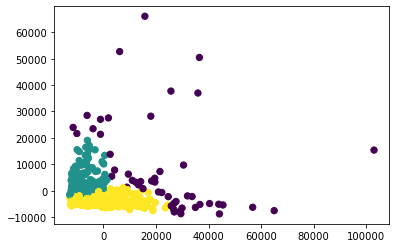

In [96]:
from sklearn.mixture import GaussianMixture as GMM

gmm = GMM(n_components=3).fit(Y2d)
labels = gmm.predict(Y2d)
plt.scatter(Y2d[:, 0], Y2d[:, 1], c=labels, s=40, cmap='viridis');

In [97]:
probs = gmm.predict_proba(Y2d)
probs

array([[1.89502378e-01, 7.98534864e-01, 1.19627586e-02],
       [1.35150410e-02, 9.86369673e-01, 1.15285877e-04],
       [1.23665168e-02, 9.87540504e-01, 9.29795175e-05],
       ...,
       [8.12878156e-01, 1.87121844e-01, 1.83447609e-20],
       [3.70205595e-03, 3.02093812e-02, 9.66088563e-01],
       [3.13088801e-03, 2.67967235e-01, 7.28901877e-01]])

In [98]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=0.5)

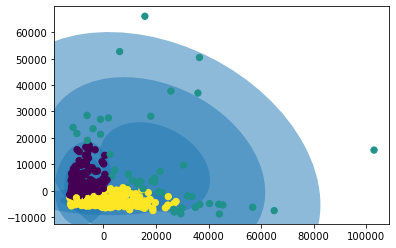

In [99]:
gmm = GMM(n_components=3, random_state=42)
plot_gmm(gmm, Y2d)

### Data Recovery
In the above figure, each cluster has a center point. These centroids (or means) are not specific data points, but are predictions of the average of all data points in their respective clusters. For solving the problem of creating customer segments, the center point of each cluster corresponds to the average customer in that segment. Since the data is now dimensionally reduced and logarithmically scaled, we can reduce representative customer expenditures from these data points by inverse transformation.

In [100]:
data_new, _ = gmm.sample(100)
data_new.shape

(100, 2)

In [101]:
labels = gmm.predict(data_new)

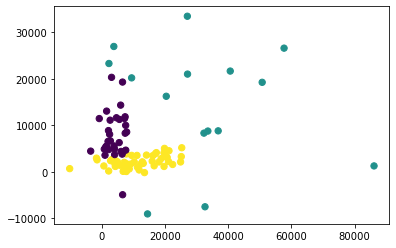

In [102]:
digits_new = pca.inverse_transform(data_new)
plt.scatter(digits_new[:, 0], digits_new[:, 1], c=labels, s=40, cmap='viridis');

Comparing the previous Y2d plots with the sample plots generated from the GMM, we find that this seems to be very similar, which proves that the reconstruction ability of our trained model is very strong.